## USING THE RAVDESS EMOTIONAL SPEECH DATASET

## File naming convention

- Each of the 2880 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- **Filename identifiers**

    - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

    - Vocal channel (01 = speech, 02 = song).

    - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

    - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

    - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

    - Repetition (01 = 1st repetition, 02 = 2nd repetition).

    - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

    - Filename example: 03-01-06-01-02-01-12.wav<br></br>

        - Audio-only (03)
        - Speech (01)
        - Fearful (06)
        - Normal intensity (01)
        - Statement "dogs" (02)
        - 1st Repetition (01)
        - 12th Actor (12)
        - Female, as the actor ID number is even.

https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

### Step 1: Load and Explore the Dataset
Load the audio dataset, explore class distribution, and examine a few samples.

In [ ]:
!pip install kagglehub
!pip install librosa

In [ ]:
! pip install tensorflow

In [ ]:
# importing the necessary libraries

import os
import pandas as pd, numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import Audio

import warnings
warnings.filterwarnings("ignore")
import kagglehub


In [ ]:
pathRAVDESS = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", pathRAVDESS)

Path to dataset files: /kaggle/input/ravdess-emotional-speech-audio


In [ ]:
audioDr = pathRAVDESS

audioFiles = []

for rt, dr, files in os.walk(audioDr):
    for audioName in files:
        if audioName.endswith(".wav"):

            filePath = os.path.join(rt, audioName)
            components = audioName.split("-")

            decodeInfo = {
                "Modality": "Full-AV" if components[0] == "01" else "Video-only" if components[0] == "02" else "Audio-only",
                "Vocal_Channel": "Speech" if components[1] == "01" else "Song",
                "Emotion": ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"][int(components[2]) - 1],
                "Emotional_Intensity": "Normal" if components[3] == "01" else "Strong",
                "Statement": "Kids are talking by the door" if components[4] == "01" else "Dogs are sitting by the door",
                "Repetition": "1st" if components[5] == "01" else "2nd",
                "Actor": int(os.path.splitext(components[6])[0]),
                "Gender": "Male" if int(os.path.splitext(components[6])[0])%2 != 0 else "Female",
                "File_Path": filePath
            }

            decodeInfo["AudioName"] = audioName

            audioFiles.append(decodeInfo)

AudioDf = pd.DataFrame(audioFiles)

print(AudioDf.head())

AudioDf.to_csv("Ravdess_Decoded_with_paths.csv", index = False)


     Modality Vocal_Channel    Emotion Emotional_Intensity  \
0  Audio-only        Speech  Surprised              Normal   
1  Audio-only        Speech    Neutral              Normal   
2  Audio-only        Speech    Disgust              Strong   
3  Audio-only        Speech    Disgust              Normal   
4  Audio-only        Speech    Neutral              Normal   

                      Statement Repetition  Actor  Gender  \
0  Kids are talking by the door        1st      2  Female   
1  Kids are talking by the door        1st      2  Female   
2  Kids are talking by the door        2nd      2  Female   
3  Kids are talking by the door        2nd      2  Female   
4  Dogs are sitting by the door        1st      2  Female   

                                           File_Path                 AudioName  
0  /kaggle/input/ravdess-emotional-speech-audio/A...  03-01-08-01-01-01-02.wav  
1  /kaggle/input/ravdess-emotional-speech-audio/A...  03-01-01-01-01-01-02.wav  
2  /kaggle/input/

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.signal import butter, lfilter

# Function to apply a basic high-pass filter to remove low-frequency noise
def butter_highpass_filter(data, cutoff=100, fs=16000, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Get the audio path from the DataFrame
file_path = AudioDf.loc[10, "File_Path"]  # Change index as needed

# Load audio
y, sr = librosa.load(file_path, sr=16000)

# Apply high-pass filter
y_cleaned = butter_highpass_filter(y, cutoff=100, fs=sr)

# Listen to the cleaned audio
print("▶️ Playing Cleaned Audio:")
Audio(y_cleaned, rate=sr)

▶️ Playing Cleaned Audio:


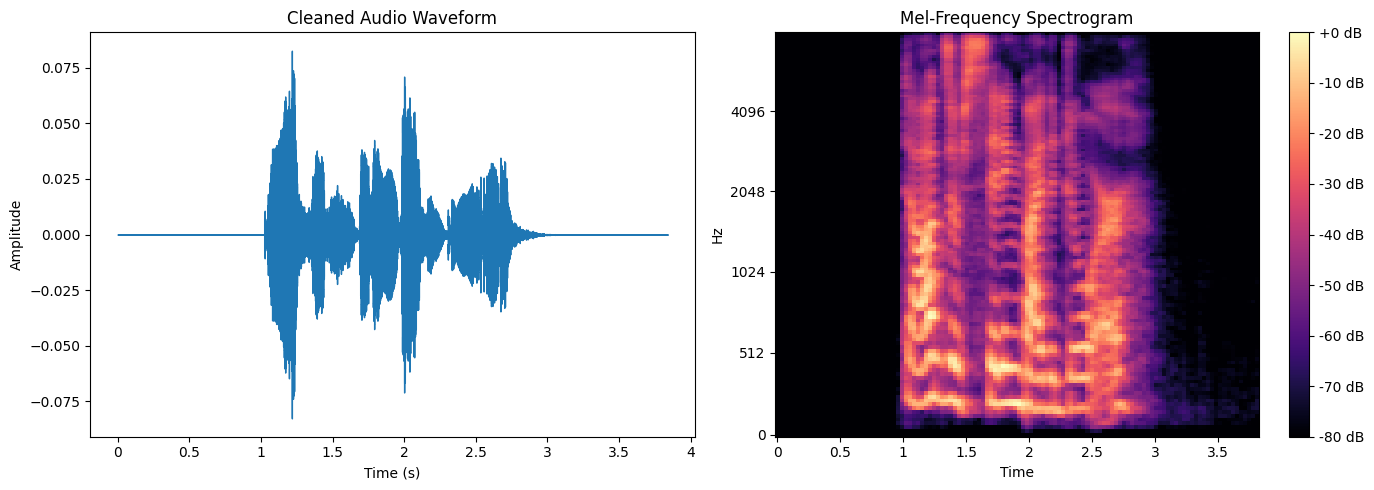

In [ ]:
# Plot waveform and mel spectrogram
plt.figure(figsize=(14, 5))

# Plot waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(y_cleaned, sr=sr)
plt.title('Cleaned Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot mel spectrogram
plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=y_cleaned, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency Spectrogram')

plt.tight_layout()
plt.show()

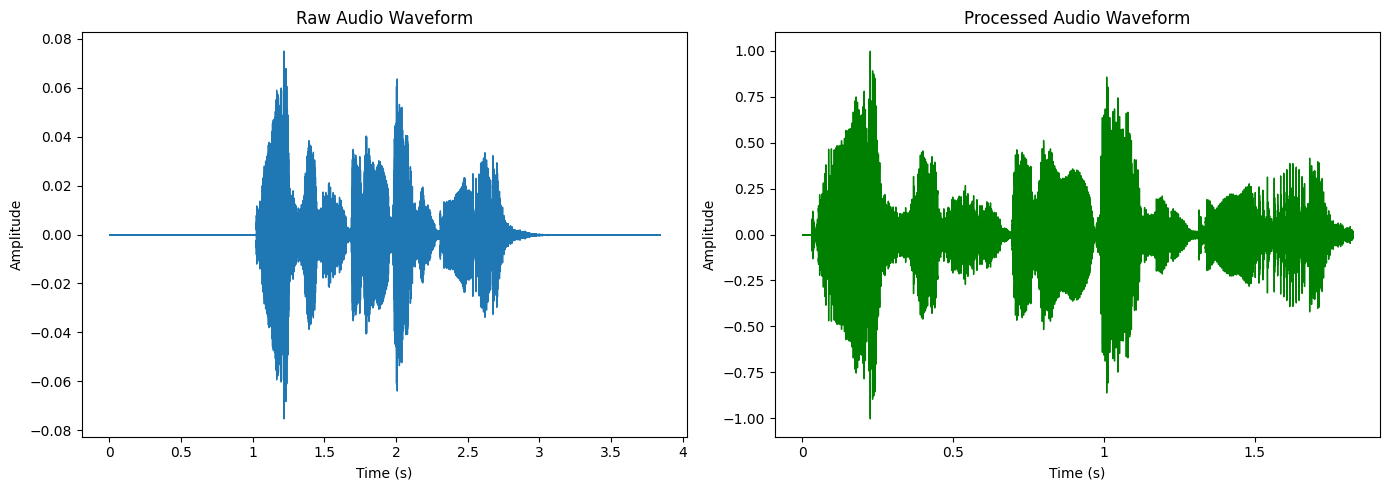

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter
from IPython.display import Audio

# High-pass filter function
def butter_highpass_filter(data, cutoff=100, fs=16000, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return lfilter(b, a, data)

# Load raw audio from DataFrame (e.g., index 10)
file_path = AudioDf.loc[10, "File_Path"]  # Change as needed
y_raw, sr = librosa.load(file_path, sr=16000)

# Preprocess: Filter → Normalize → Trim
y_filtered = butter_highpass_filter(y_raw, cutoff=100, fs=sr)
y_normalized = librosa.util.normalize(y_filtered)
y_processed, _ = librosa.effects.trim(y_normalized, top_db=20)

# Plot comparison
plt.figure(figsize=(14, 5))

# Raw waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(y_raw, sr=sr)
plt.title("Raw Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Processed waveform
plt.subplot(1, 2, 2)
librosa.display.waveshow(y_processed, sr=sr, color='green')
plt.title("Processed Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [ ]:
print("🔊 Raw Audio:")
display(Audio(y_raw, rate=sr))

print("🔊 Processed Audio:")
display(Audio(y_processed, rate=sr))

🔊 Raw Audio:


🔊 Processed Audio:


In [ ]:
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# from scipy.signal import butter, lfilter
# from tqdm import tqdm

# # 📁 Create directory to save plots (optional)
# os.makedirs("processed_waveform_plots", exist_ok=True)

# # 🎛️ High-pass filter function
# def butter_highpass_filter(data, cutoff=100, fs=16000, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='high', analog=False)
#     return lfilter(b, a, data)

# # 🔁 Loop through each audio file in the DataFrame
# for idx, row in tqdm(AudioDf.iterrows(), total=len(AudioDf)):

#     try:
#         file_path = row["File_Path"]
#         emotion = row["Emotion"]
#         audio_name = row["AudioName"]

#         # Load raw audio
#         y_raw, sr = librosa.load(file_path, sr=16000)

#         # Apply preprocessing
#         y_filtered = butter_highpass_filter(y_raw, cutoff=100, fs=sr)
#         y_normalized = librosa.util.normalize(y_filtered)
#         y_processed, _ = librosa.effects.trim(y_normalized, top_db=20)

#         # Plot comparison
#         plt.figure(figsize=(12, 4))

#         # Raw
#         plt.subplot(1, 2, 1)
#         librosa.display.waveshow(y_raw, sr=sr)
#         plt.title("Raw Audio")

#         # Processed
#         plt.subplot(1, 2, 2)
#         librosa.display.waveshow(y_processed, sr=sr, color='green')
#         plt.title("Processed Audio")

#         plt.suptitle(f"{emotion} - {audio_name}", fontsize=10)
#         plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#         # 💾 Save plot image
#         plot_filename = os.path.join("processed_waveform_plots", f"{os.path.splitext(audio_name)[0]}.png")
#         plt.savefig(plot_filename, dpi=150)
#         plt.close()

#         # ✅ Optional: Save processed audio (if needed)
#         # librosa.output.write_wav(f'processed_audio/{audio_name}', y_processed, sr)

#     except Exception as e:
#         print(f"❌ Error processing file {file_path}: {e}")
#         continue

### Task 2: MLP and (Ensemble Model - Voting Classifier)
Combine multiple classifiers using a hard voting ensemble strategy to improve performance.

In [ ]:
# Extract MFCC features from the WAV files in AudioDf
X_features = []
y_labels = []

for i, row in AudioDf.iterrows():
    file_path = row['File_Path']
    emotion_label = row['Emotion']

    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc_scaled = np.mean(mfcc.T, axis=0)

        X_features.append(mfcc_scaled)
        y_labels.append(emotion_label)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("Total features extracted:", len(X_features))


Total features extracted: 2880


In [ ]:
AudioDf[AudioDf['Vocal_Channel'] == "Speech"]

,Modality,Vocal_Channel,Emotion,Emotional_Intensity,Statement,Repetition,Actor,Gender,File_Path,AudioName
0,Audio-only,Speech,Surprised,Normal,Kids are talking by the door,1st,2,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-08-01-01-01-02.wav
1,Audio-only,Speech,Neutral,Normal,Kids are talking by the door,1st,2,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-01-01-01-01-02.wav
2,Audio-only,Speech,Disgust,Strong,Kids are talking by the door,2nd,2,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-07-02-01-02-02.wav
3,Audio-only,Speech,Disgust,Normal,Kids are talking by the door,2nd,2,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-07-01-01-02-02.wav
4,Audio-only,Speech,Neutral,Normal,Dogs are sitting by the door,1st,2,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-01-01-02-01-02.wav
...,...,...,...,...,...,...,...,...,...,...
2875,Audio-only,Speech,Fearful,Normal,Kids are talking by the door,2nd,7,Male,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-06-01-01-02-07.wav
2876,Audio-only,Speech,Angry,Normal,Dogs are sitting by the door,2nd,7,Male,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-05-01-02-02-07.wav
2877,Audio-only,Speech,Sad,Strong,Kids are talking by the door,1st,7,Male,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-04-02-01-01-07.wav
2878,Audio-only,Speech,Disgust,Strong,Dogs are sitting by the door,2nd,7,Male,/kaggle/input/ravdess-emotional-speech-audio/A...,03-01-07-02-02-02-07.wav


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = np.array(X_features)
y = np.array(y_labels)

# Encode emotion labels (text → numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the MLP model
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(30, 15, 20),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train and evaluate MLP
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

# Accuracy and report
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy:", mlp_accuracy)
print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

MLP Classifier Accuracy: 0.9270833333333334
              precision    recall  f1-score   support

       Angry       0.98      0.98      0.98        87
        Calm       0.95      0.95      0.95        84
     Disgust       0.93      1.00      0.96        75
     Fearful       0.94      0.97      0.95        62
       Happy       0.83      0.86      0.84        69
     Neutral       0.77      0.94      0.85        35
         Sad       0.98      0.89      0.93        89
   Surprised       0.97      0.84      0.90        75

    accuracy                           0.93       576
   macro avg       0.92      0.93      0.92       576
weighted avg       0.93      0.93      0.93       576



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define base models
log_clf = LogisticRegression(max_iter=500, random_state=42)
svc_clf = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Build voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svc', svc_clf),
    ('rf', rf_clf)
], voting='hard')

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", voting_accuracy)
print(classification_report(y_test, y_pred_voting, target_names=label_encoder.classes_))


Voting Classifier Accuracy: 0.8072916666666666
              precision    recall  f1-score   support

       Angry       0.88      0.94      0.91        87
        Calm       0.70      0.96      0.81        84
     Disgust       0.79      0.88      0.83        75
     Fearful       0.76      0.82      0.79        62
       Happy       0.80      0.74      0.77        69
     Neutral       0.78      0.40      0.53        35
         Sad       0.88      0.65      0.75        89
   Surprised       0.91      0.83      0.87        75

    accuracy                           0.81       576
   macro avg       0.81      0.78      0.78       576
weighted avg       0.82      0.81      0.80       576



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define base models
log_clf = LogisticRegression(max_iter=500, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=500, random_state=42)

# Build soft voting ensemble with MLP
voting_clf_with_mlp = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('mlp', mlp_clf)
], voting='soft')

# Train and evaluate
voting_clf_with_mlp.fit(X_train, y_train)
y_pred_voting_mlp = voting_clf_with_mlp.predict(X_test)

voting_mlp_accuracy = accuracy_score(y_test, y_pred_voting_mlp)
print("Voting Classifier (with MLP) Accuracy:", voting_mlp_accuracy)
print(classification_report(y_test, y_pred_voting_mlp, target_names=label_encoder.classes_))

Voting Classifier (with MLP) Accuracy: 0.9340277777777778
              precision    recall  f1-score   support

       Angry       0.98      0.98      0.98        87
        Calm       0.95      0.95      0.95        84
     Disgust       0.95      1.00      0.97        75
     Fearful       0.94      0.97      0.95        62
       Happy       0.86      0.86      0.86        69
     Neutral       0.77      0.94      0.85        35
         Sad       0.98      0.91      0.94        89
   Surprised       0.97      0.87      0.92        75

    accuracy                           0.93       576
   macro avg       0.92      0.93      0.93       576
weighted avg       0.94      0.93      0.93       576



### Task 3: Deep Convolutional Neural Network (CNN) Model
We use a CNN with at least 3 convolutional layers to classify emotion based on MFCC features.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape MFCCs for CNN input: (samples, 40, 1, 1)
X_cnn = X_scaled.reshape(X_scaled.shape[0], 40, 1, 1)

# One-hot encode emotion labels
y_cnn = to_categorical(y_encoded)

# Split data for CNN
from sklearn.model_selection import train_test_split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build CNN with 3 Conv layers
cnn = Sequential()
cnn.add(Conv2D(32, (3,1), activation='relu', input_shape=(40,1,1)))
cnn.add(MaxPooling2D((2,1)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(64, (3,1), activation='relu'))
cnn.add(MaxPooling2D((2,1)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128, (3,1), activation='relu'))
cnn.add(MaxPooling2D((2,1)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=16, validation_data=(X_test_cnn, y_test_cnn), verbose=1)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2304 - loss: 2.0108 - val_accuracy: 0.2552 - val_loss: 1.9028
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4656 - loss: 1.4679 - val_accuracy: 0.4375 - val_loss: 1.5732
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6244 - loss: 1.0825 - val_accuracy: 0.6736 - val_loss: 1.0608
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7405 - loss: 0.7831 - val_accuracy: 0.7656 - val_loss: 0.7574
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8163 - loss: 0.5499 - val_accuracy: 0.8438 - val_loss: 0.5796
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8902 - loss: 0.3779 - val_accuracy: 0.8576 - val_loss: 0.5194
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9270 - loss: 0.2572 - val_accuracy: 0.8941 - val_loss: 0.3851
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9365 - loss: 0.1982 - val_accuracy: 

In [ ]:
# Evaluate CNN
cnn_score = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
cnn_accuracy = cnn_score[1]
print("CNN Accuracy:", cnn_accuracy)

CNN Accuracy: 0.9253472089767456


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Run KMeans clustering
n_clusters = len(np.unique(y_encoded))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_preds = kmeans.fit_predict(X_scaled)

# Evaluation metrics
ari_score = adjusted_rand_score(y_encoded, cluster_preds)
silhouette = silhouette_score(X_scaled, cluster_preds)

print("Adjusted Rand Index (ARI):", ari_score)
print("Silhouette Score:", silhouette)

Adjusted Rand Index (ARI): 0.03303152501336914
Silhouette Score: 0.1095762


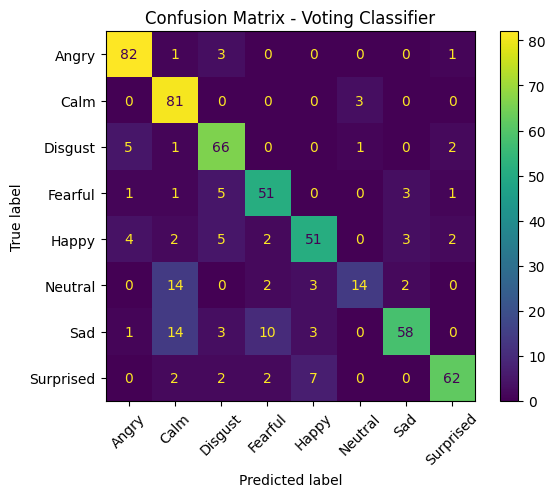

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Voting Classifier confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=label_encoder.classes_)
disp_voting.plot(cmap='viridis')
plt.title("Confusion Matrix - Voting Classifier")
plt.xticks(rotation=45)
plt.show()

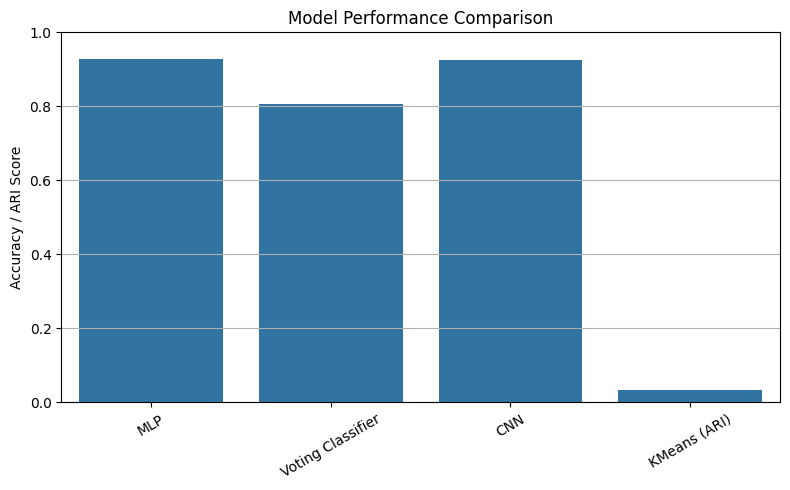

In [ ]:
# Use the existing model_scores dictionary or define a new one
model_scores = {}

# Attempt to collect all accuracy scores
try: model_scores['MLP'] = mlp_accuracy
except: model_scores['MLP'] = None

try: model_scores['Random Forest'] = rf_accuracy
except: model_scores['Random Forest'] = None

try: model_scores['Voting Classifier'] = voting_accuracy
except: model_scores['Voting Classifier'] = None

try: model_scores['CNN'] = cnn_accuracy
except: model_scores['CNN'] = None

try: model_scores['KMeans (ARI)'] = ari_score
except: model_scores['KMeans (ARI)'] = None

# Filter out None values for plotting
filtered_scores = {k: v for k, v in model_scores.items() if v is not None}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(filtered_scores.keys()), y=list(filtered_scores.values()))
plt.ylabel("Accuracy / ARI Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

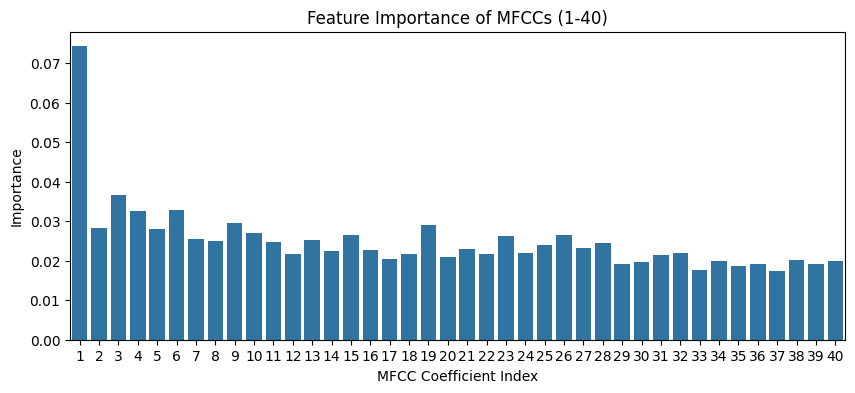

In [ ]:
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier().fit(X_scaled, y_encoded).feature_importances_

plt.figure(figsize=(10,4))
sns.barplot(x=np.arange(1, 41), y=importances)
plt.title("Feature Importance of MFCCs (1-40)")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Importance")
plt.show()

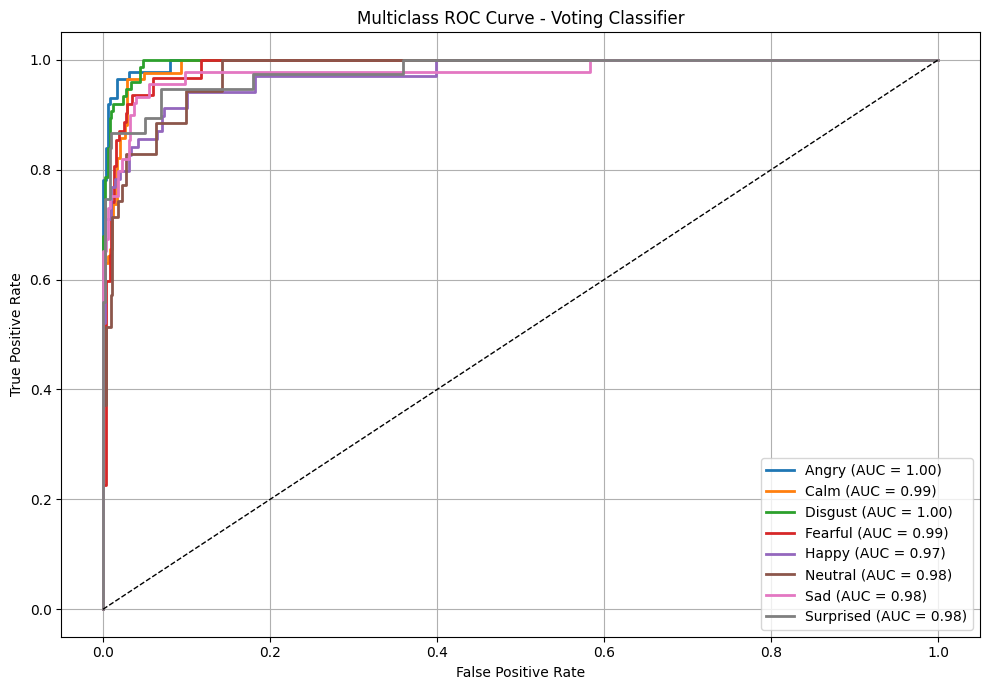

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define Voting Classifier (make sure SVC has probability=True)
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=500, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
], voting='soft')

# Step 2: Train the classifier
voting_clf.fit(X_train, y_train)

# Step 3: Predict probabilities on test set
y_score = voting_clf.predict_proba(X_test)

# Step 4: Binarize true test labels
y_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes = y_bin.shape[1]

# Step 5: Plot ROC curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("Multiclass ROC Curve - Voting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

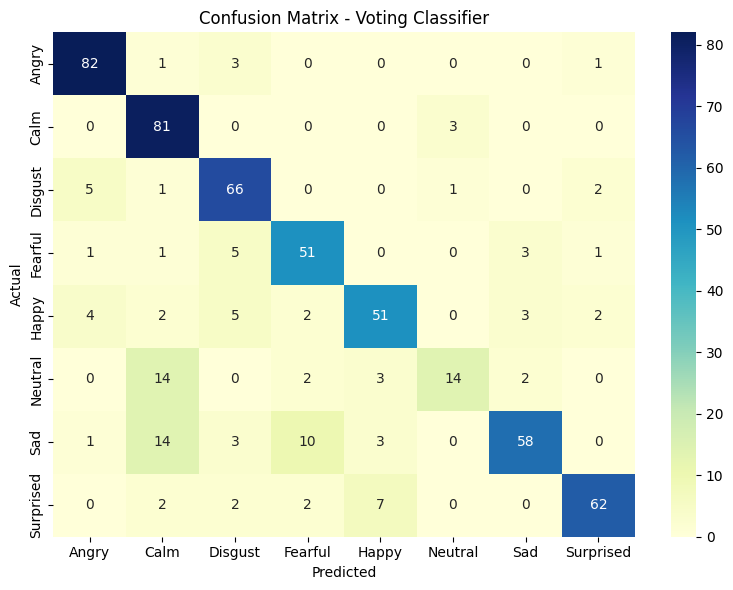

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Features

The 40 MFCC features extracted for each audio sample represent the short-term power spectrum of sound based on a Mel-scale frequency. MFCCs are derived by applying a Discrete Cosine Transform (DCT) to the log power of the Mel-scaled filterbanks.

Lower-order MFCCs (e.g., MFCC1 to MFCC5) capture coarse spectral shape (overall tone and pitch)

Middle-order MFCCs (MFCC6 to MFCC20) reflect more detailed articulation patterns

Higher-order MFCCs (MFCC21 to MFCC40) often represent subtle spectral changes and noise, and may contain emotion-relevant information such as tremble, energy, and prosody variations

Although each coefficient has no specific ‘semantic’ meaning individually, together they form a compact and powerful representation of vocal timbre and tone, which is critical for classifying emotional content in speech.

## Labels

Neutral

Calm

Happy

Sad

Angry

Fearful

Disgust

Surprised

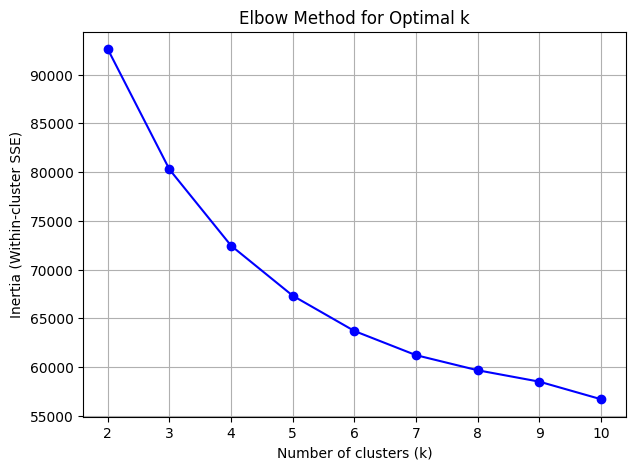

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

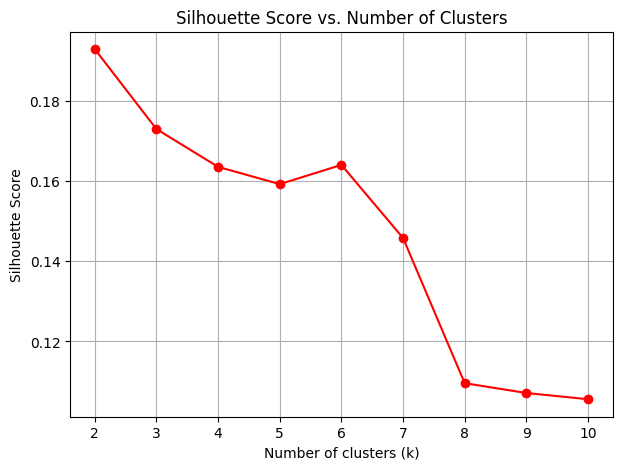

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, preds)
    sil_scores.append(sil)

plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Fit GMM
gmm = GaussianMixture(n_components=8, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate GMM
ari_gmm = adjusted_rand_score(y_encoded, gmm_labels)
sil_gmm = silhouette_score(X_scaled, gmm_labels)

print("GMM ARI:", ari_gmm)
print("GMM Silhouette Score:", sil_gmm)

GMM ARI: 0.04648866514930776
GMM Silhouette Score: 0.089491114


In [ ]:
from sklearn.cluster import DBSCAN

# Try DBSCAN with basic params (you may tune eps)
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise for silhouette (DBSCAN may label noise as -1)
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1 and sum(mask) > 0:
    ari_dbscan = adjusted_rand_score(y_encoded[mask], dbscan_labels[mask])
    sil_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN ARI:", ari_dbscan)
    print("DBSCAN Silhouette Score:", sil_dbscan)
else:
    print("DBSCAN found too few clusters or labeled all as noise.")


DBSCAN ARI: 0.145517168899477
DBSCAN Silhouette Score: 0.35240275


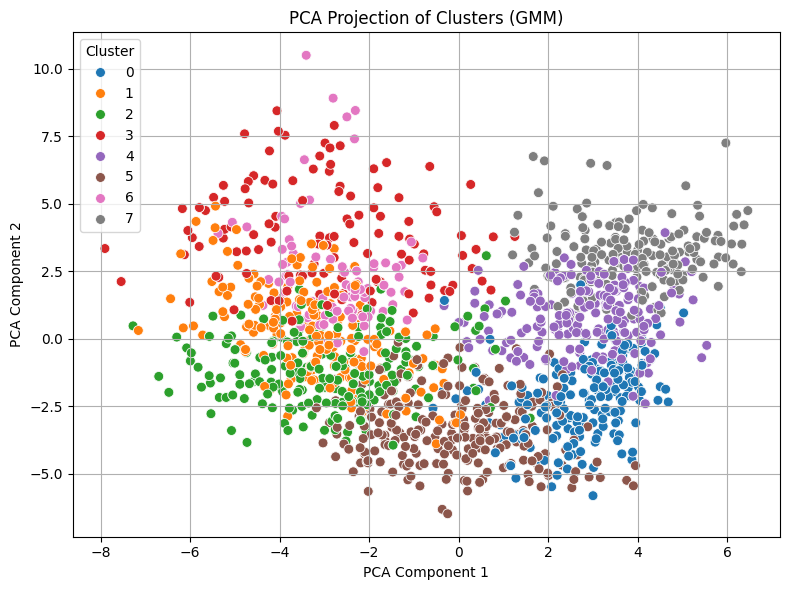

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot using GMM clusters (or use kmeans_labels, dbscan_labels, etc.)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette="tab10", s=50)
plt.title("PCA Projection of Clusters (GMM)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

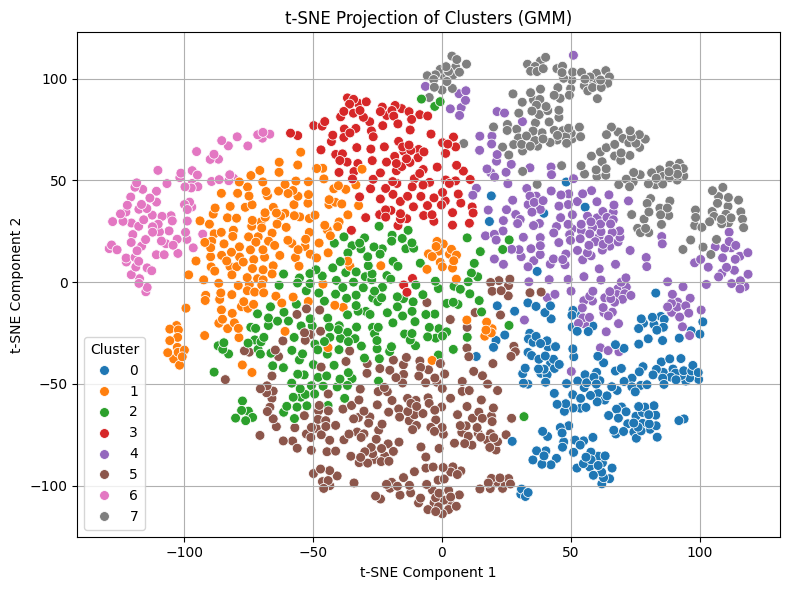

In [ ]:
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=gmm_labels, palette="tab10", s=50)
plt.title("t-SNE Projection of Clusters (GMM)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## Research Papers

- https://ieeexplore.ieee.org/abstract/document/9413910
- https://ieeexplore.ieee.org/abstract/document/8462685